# Project: Investigate a Dataset - [TMDb Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> We will be looking at the TMDb movie data that has collected information for more than 10,000 different movies between the years of 1960 and 2015 from The Movie Database (TMDb).

>The TMDb movie data includes data on genre, an overview, keywords, popularity, budget, revenue, adjusted budget, adjusted revenue, original title, cast, director, runtime, production company, release date, tagline, website homepage, id, imdb id, vote count, average vote, release year, release date.


### Question(s) for Analysis
 
**General Questions:**

- Question 1: What is the average runtime?
- Question 2: Which movie had the highest and lowest revenue?


**What are some features that are associated with top movies?**

- Question 3.1: Which genre makes the most profit?
- Question 3.2: Which genres have the highest popularity rating?
- Question 3.3: Who are the top actors and directors?

In [1]:
# Importing all of the packages needed for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*Imported Seaborn as sns for question 3.2.*

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report we will be loading the data and checking for cleanliness, then we will trim and clean the dataset so we can perform analysis on it.

### General Properties:  

In [2]:
# Read the CSV file
tmdb_data = pd.read_csv('tmdb-movies.csv')
# Printing the first five rows of the dataset
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Finding the shape of the dataframe
tmdb_data.shape

(10866, 21)

In [4]:
#Checking the dataframe information
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

*Looks like we are missing some data! We will fix this later.*

In [5]:
# Looking at the data types now
tmdb_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# Checking for duplicates in the dataframe
tmdb_data.duplicated().sum()

1

*There is one duplicate in the dataframe. We will need to drop this later.*

*Now let's check for null and unique values!*

In [7]:
#Checking for null values in the dataframe
tmdb_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
tmdb_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

*There are over 10,000 missing values with majority of those coming from the column's homepage, tagline, keywords, and production_companies. We do not need those four columns to do our analysis so we can drop them. Columns cast, director, and genre are needed for the analysis so we will keep them.*

*We will need to look further into why some columns have a low count of unique values.*

In [9]:
#Lets check the statistics of the data
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
After looking at the dataframe in detail there are a few data cleaning decisions I have made. They are:
- Drop the columns: imdb_id, homepage, tagline. production_companies, release_date, and overview. These are unnecessary for our analysis.
- Drop the one duplicate data from the set.
- Drop all of the null values.
- Replace the '0' values from budget and revenue with null.
- Drop the '0' values from the runtime

*First lets drop the data and columns that are unnecessary and then we will verify they were dropped.*

In [10]:
#Dropping the columns
tmdb_data.drop(['imdb_id', 'homepage', 'tagline', 'production_companies', 'release_date', 'overview'], axis=1, inplace=True)

In [11]:
#Dropping the duplicates
tmdb_data.drop_duplicates(inplace=True)

In [12]:
#Dropping the null values
tmdb_data.dropna(inplace=True)

*Now lets verify we have dropped all unnecessary data!*

In [13]:
#Checking to see if the columns were dropped
tmdb_data.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [14]:
#Checking the duplicates
tmdb_data.duplicated().sum()

0

In [15]:
#Checking null values
tmdb_data.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
keywords          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [16]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9306 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9306 non-null   int64  
 1   popularity      9306 non-null   float64
 2   budget          9306 non-null   int64  
 3   revenue         9306 non-null   int64  
 4   original_title  9306 non-null   object 
 5   cast            9306 non-null   object 
 6   director        9306 non-null   object 
 7   keywords        9306 non-null   object 
 8   runtime         9306 non-null   int64  
 9   genres          9306 non-null   object 
 10  vote_count      9306 non-null   int64  
 11  vote_average    9306 non-null   float64
 12  release_year    9306 non-null   int64  
 13  budget_adj      9306 non-null   float64
 14  revenue_adj     9306 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.1+ MB


*Everything looks like it should, so now let's find how many '0' values are in budget, revenue, and runtime.*

In [17]:
#Finding the '0' values in budget column
budget_zero_values = (tmdb_data['budget'] == 0).sum()
budget_zero_values

4479

In [18]:
#Finding the '0' values in revenue column
revenue_zero_values = (tmdb_data['revenue'] == 0).sum()
revenue_zero_values

4695

In [19]:
#Finding the '0' values in the runtime column
runtime_zero_values = (tmdb_data['runtime'] == 0).sum()
runtime_zero_values

13

*Now that we can see there are 4479 '0' values in budget and 4695 '0' values in revenue we can change them to null. We will be dropping the 13 '0' values in in runtime since there are only 13.*

In [20]:
#Replacing the '0' values in budget to null
tmdb_data.loc[tmdb_data['budget'] == 0, 'budget'] = np.nan

In [21]:
#Replacing the '0' values in revenue to null
tmdb_data.loc[tmdb_data['revenue'] == 0, 'revenue'] = np.nan

In [22]:
#Dropping the '0' values in runtime
tmdb_data = tmdb_data.query('runtime != 0')

*We should make sure those '0' values have been replaced with null for budget and revenue and runtimes '0' values were dropped.*

In [23]:
#Verifying the '0' values in budget are now null
budget_zero_values = (tmdb_data['budget'] == 0).sum()
budget_zero_values

0

In [24]:
#Verifiying the '0' values in revenue are now null
revenue_zero_values = (tmdb_data['revenue'] == 0).sum()
revenue_zero_values

0

In [25]:
#Checking to see there are no '0' values in runtime
runtime_zero_values = (tmdb_data['runtime'] == 0).sum()
runtime_zero_values

0

*After completing the data cleaning we should check the information and statistics one last time before we move on.*

In [26]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9293 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9293 non-null   int64  
 1   popularity      9293 non-null   float64
 2   budget          4825 non-null   float64
 3   revenue         4611 non-null   float64
 4   original_title  9293 non-null   object 
 5   cast            9293 non-null   object 
 6   director        9293 non-null   object 
 7   keywords        9293 non-null   object 
 8   runtime         9293 non-null   int64  
 9   genres          9293 non-null   object 
 10  vote_count      9293 non-null   int64  
 11  vote_average    9293 non-null   float64
 12  release_year    9293 non-null   int64  
 13  budget_adj      9293 non-null   float64
 14  revenue_adj     9293 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 1.1+ MB


In [27]:
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9293.000000,9293.000000,4.825000e+03,4.611000e+03,9293.000000,9293.000000,9293.000000,9293.000000,9.293000e+03,9.293000e+03
mean,58095.129667,0.708578,3.192636e+07,9.263830e+07,103.558915,247.947380,6.001420,2000.402238,1.994578e+07,5.937767e+07
std,86440.453831,1.063810,3.962712e+07,1.650279e+08,28.131029,616.384932,0.909751,13.069273,3.620855e+07,1.546329e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9991.000000,0.231517,6.500000e+06,8.686120e+06,91.000000,19.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00
50%,17134.000000,0.422934,1.850000e+07,3.456058e+07,100.000000,47.000000,6.100000,2005.000000,5.408346e+05,0.000000e+00
75%,58151.000000,0.791280,4.000000e+07,1.031031e+08,113.000000,181.000000,6.600000,2011.000000,2.581075e+07,4.656033e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: What is the average runtime of all the movies?

In [28]:
#Lets find the average run time of the movies by using .mean()
tmdb_data['runtime'].mean()

103.55891531260089

*It looks like the average runtime is:* **103.56**

*Now let put this in a histogram so we can visualize it.*

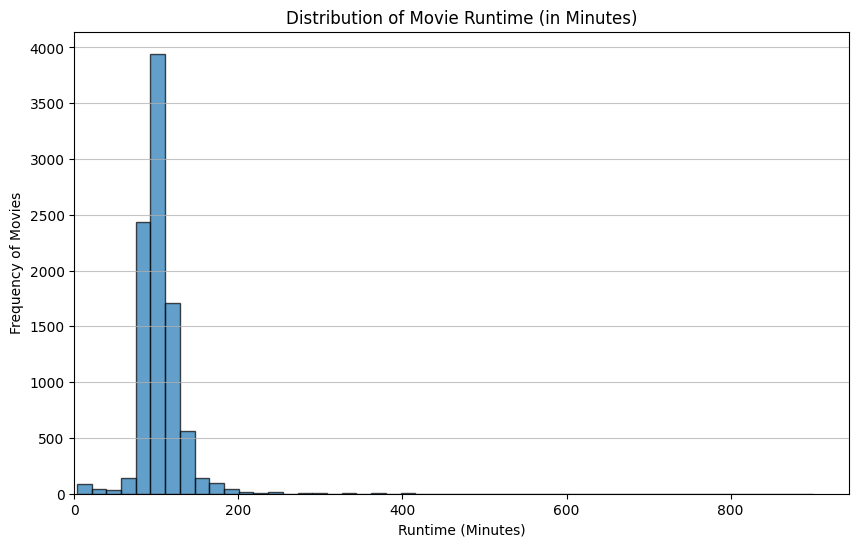

In [29]:
#Creating the histogram
plt.figure(figsize=(10, 6));
tmdb_data['runtime'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)

#Histogram Title
plt.title('Distribution of Movie Runtime (in Minutes)')

#Title of the x-axis
plt.xlabel('Runtime (Minutes)')

#Title of the y-axis
plt.ylabel('Frequency of Movies')

#Ensuring x-axis starts from 0
plt.xlim(left=0)

#Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

*We should look to see why our histogram is so large, maybe we have some outliers.*

In [30]:
tmdb_data['runtime'].describe()

count    9293.000000
mean      103.558915
std        28.131029
min         3.000000
25%        91.000000
50%       100.000000
75%       113.000000
max       900.000000
Name: runtime, dtype: float64

*Looking above we can notice the max runtime is **900 minutes**! That's why our histogram is so large and skewed. Lets set the x-axis to a limit of 400 to get a better view since most values fall before 400 minutes*

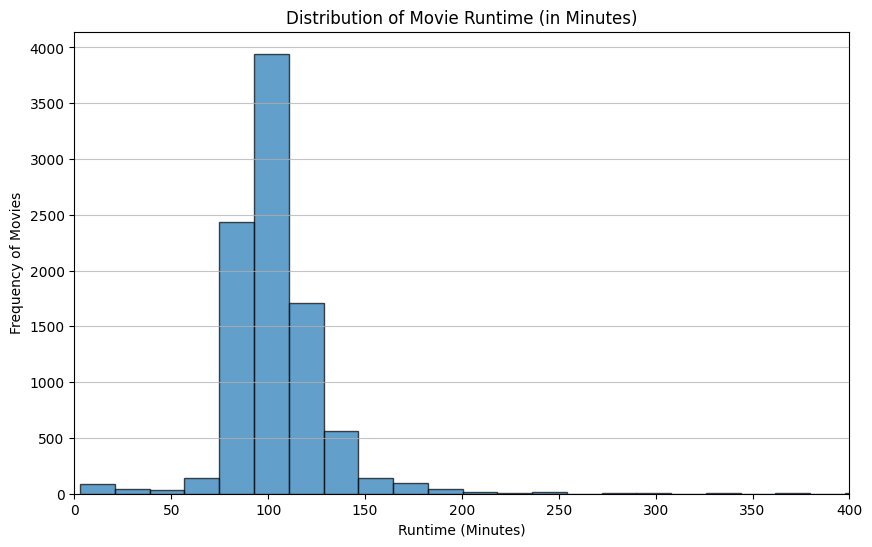

In [31]:
#Creating the histogram
plt.figure(figsize=(10, 6));
tmdb_data['runtime'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)

#Histogram Title
plt.title('Distribution of Movie Runtime (in Minutes)')

#Title of the x-axis
plt.xlabel('Runtime (Minutes)')

#Title of the y-axis
plt.ylabel('Frequency of Movies')

#Ensuring x-axis starts from 0 and ends at 400
plt.xlim(0, 400)

#Adding a grid for better readability
plt.grid(axis='y', alpha=0.75)

*This is much better and shows that most movie runtimes fall between 90 and 120 minutes!*

### Question 2: Which movies had the higest and lowest profit?

*We need to convert columns budget and revenue into int64 instead of float64 to be able to make calculations to show profit.*

In [32]:
#First let'smake a copy of our dataset to work with
tmdb_data_copy = tmdb_data.copy()

#Filling null values with '0' to change the datatype from float to int
tmdb_data_copy['budget'] = tmdb_data_copy['budget'].fillna(0)
tmdb_data_copy['revenue'] = tmdb_data_copy['revenue'].fillna(0)

In [33]:
#Converting budget and revenue from float64 to int64
tmdb_data_copy['budget'] = tmdb_data_copy['budget'].astype(np.int64)
tmdb_data_copy['revenue'] = tmdb_data_copy['revenue'].astype(np.int64)

#Lets check the datatypes now for the copy
tmdb_data_copy.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
keywords           object
runtime             int64
genres             object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [34]:
#Calculating profit now by subtracting budget from revenue
tmdb_data_copy['profit'] = tmdb_data_copy['revenue'] - tmdb_data_copy['budget']

#Checking for the new column profit
tmdb_data_copy.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201


In [35]:
#Finding the Movie with the lowest profit
tmdb_data_copy.loc[tmdb_data_copy['profit'].idxmin()]

id                                                            46528
popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
keywords          assassin|small town|revenge|deception|super speed
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
budget_adj                                              425000000.0
revenue_adj                                     

In [36]:
#Finding the movie with the highest profit
tmdb_data_copy.loc[tmdb_data_copy['profit'].idxmax()]

id                                                            19995
popularity                                                 9.432768
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
keywords          culture clash|future|space war|space colony|so...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
budget_adj                                         240886902.887613
revenue_adj                                     

*The movie with the **highest** profit margin is **Avatar** with a profit of **2.54 billion dollars**.*

*The movie with the **lowest** profit margin is **The Warrior's Way** with a loss of **413.91 million dollars**.* 

### Question 3: What are some features associated with the most successful movies?

- 3.1: Which genre makes the most profit?
- 3.2: Which genres have the highest popularity rating?
- 3.3: Who are the top actors and directors?

**3.1:** Which genre makes the most profit? 

In [37]:
#Seperating the elements in the genre column because it contains multiple values split with '|'
tmdb_data_copy['genres'] = tmdb_data_copy['genres'].str.split('|')

#Exploding the dataframe so each genre is on a separate row
tmdb_data_exploded_copy = tmdb_data_copy.explode('genres')

In [38]:
#Grouping by genre and calculating the profit using the exploded dataframe
profit_by_genre_copy = tmdb_data_exploded_copy.groupby('genres')['profit'].sum().sort_values(ascending=False)

#Finding the genre with the highest profit
most_profitable_genre_copy = profit_by_genre_copy.idxmax()
highest_profit_copy = profit_by_genre_copy.max()

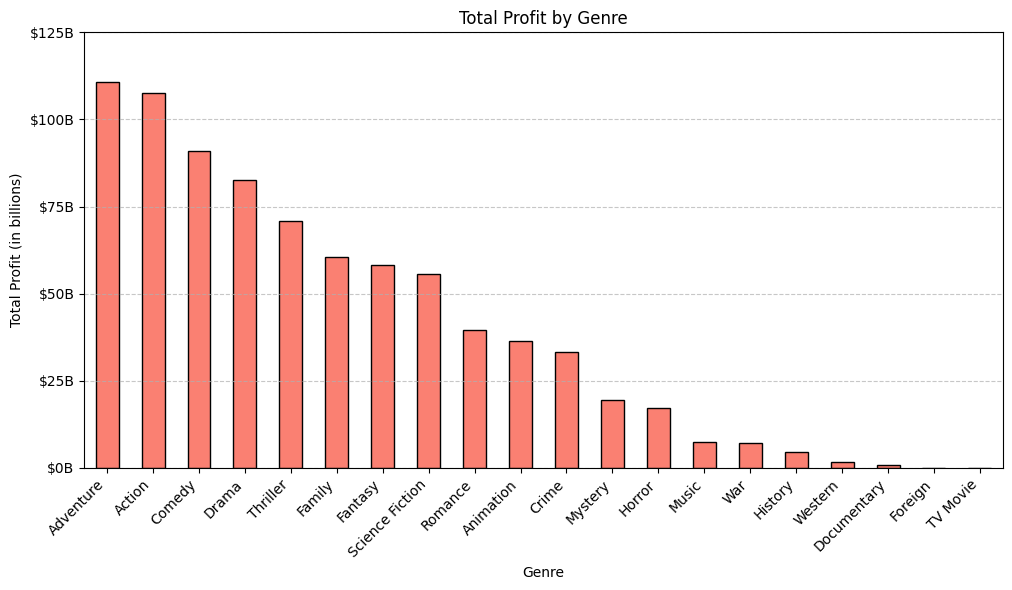

In [39]:
#Creating the bar graph
plt.figure(figsize=(10,6));
profit_by_genre_copy.plot(kind='bar', color='salmon', edgecolor='black')

#Title of the bar graph
plt.title('Total Profit by Genre')

#Title of the x-axis
plt.xlabel('Genre')

#Title of the y-axis
plt.ylabel('Total Profit (in billions)')

#Adding a grid and roatating for easier readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Adjusting the y-axis to show increments of billions
y_max = profit_by_genre_copy.max()
#Converting to billions instead of scientific notation
y_ticks = np.arange(0, np.ceil(y_max / 25e9) * 25e9 + 25e9, 25e9);
#This is what increments the y-axis
plt.yticks(y_ticks, [f'${int(x/1e9)}B' for x in y_ticks]);

*The top five genres are Adventure, Action, Comedy, Drama, and Thriller! Let's find out the average profit for those fives genres.*

In [40]:
#Filtering for the top five genres
top_five_genres = ['Adventure', 'Action', 'Comedy', 'Drama', 'Thriller']

#Filtering the exploded dataframe
top_five_genres_data = tmdb_data_exploded_copy[tmdb_data_exploded_copy['genres'].isin(top_five_genres)]

#Grouping by genre and calculating the average profit for each
average_profit_by_genre = top_five_genres_data.groupby('genres')['profit'].mean().sort_values(ascending=False)

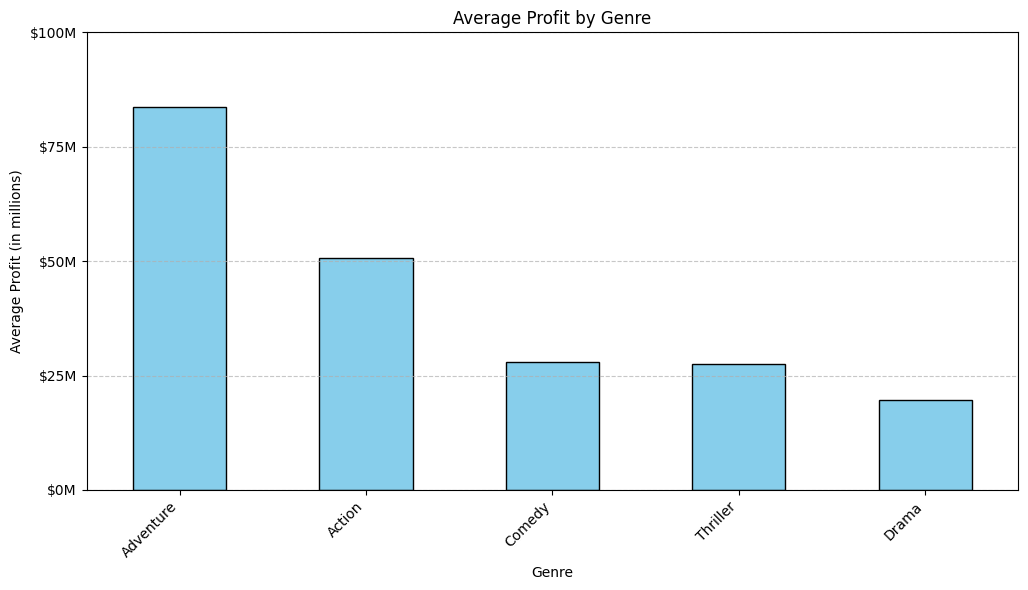

In [41]:
#Creating the bar graph
plt.figure(figsize=(10, 6));
average_profit_by_genre.plot(kind='bar', color='skyblue', edgecolor='black')

#Title of bar graph
plt.title('Average Profit by Genre')

#Title of x-axis
plt.xlabel('Genre')

#Title of the y-axis
plt.ylabel('Average Profit (in millions)')

#Adding a grid and rotating for easier readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Adjusting the y-axis to show increments of $25 million
y_max = average_profit_by_genre.max()
#Converting from scientific notation to millions
y_ticks = np.arange(0, np.ceil(y_max / 25e6) * 25e6 + 25e6, 25e6)
#This is what increments the y-axis
plt.yticks(y_ticks, [f'${int(x/1e6)}M' for x in y_ticks]);

*Now we can see the average profit of the top five genres.*
- **Adventure** has an average of around **85 million dollars**.
- **Action** has an average of around **50 million dollars**.
- **Comedy** has an average of around **27 million dollars**.
- **Thriller** has an average of around **26 million dollars**.
- **Drama** has an average of around **20 million dollars**.

**3.2:** Which genres have the highest popularity ratings?

In [42]:
#Grouping by genre and finding the max popularity
highest_popularity_by_genre = tmdb_data_exploded_copy.groupby('genres')['popularity'].max().reset_index()

#Sorting the genres by popularity
highest_popularity_by_genre_sorted = highest_popularity_by_genre.sort_values('popularity', ascending=False)

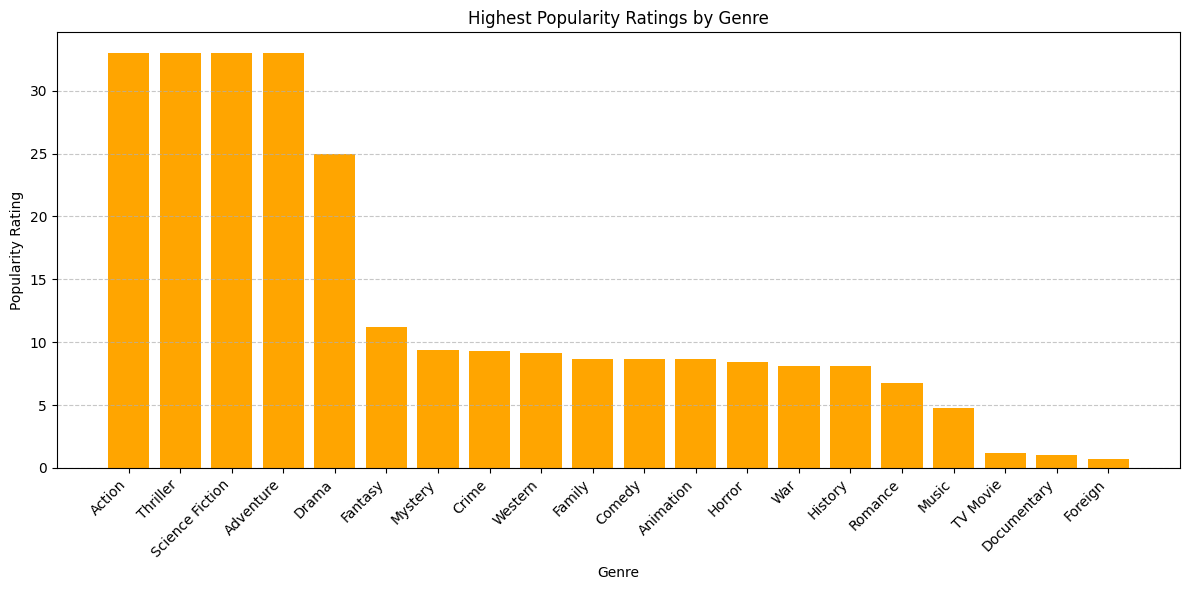

In [43]:
#Creating the bar graph
plt.figure(figsize=(12, 6))
plt.bar(highest_popularity_by_genre_sorted['genres'], highest_popularity_by_genre_sorted['popularity'], color='orange');

#Title of bar graph
plt.title('Highest Popularity Ratings by Genre')

#Title of the x-axis
plt.xlabel('Genre')

#Title of the y-axis
plt.ylabel('Popularity Rating')

#Adding a grid and rotating for easier readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

*Lets look at the top five which seem to be Action, Thriller, Science Fiction, Adventure, and Drama and see if budget has any affect on popularity.*

In [44]:
#Finding the top five genres
#.tolist() converts the elements into a python list
top_five_genres = highest_popularity_by_genre_sorted.head(5)['genres'].tolist()

#Filtering the dataframe for only the top five genres
top_five_data = tmdb_data_exploded_copy[tmdb_data_exploded_copy['genres'].isin(top_five_genres)]

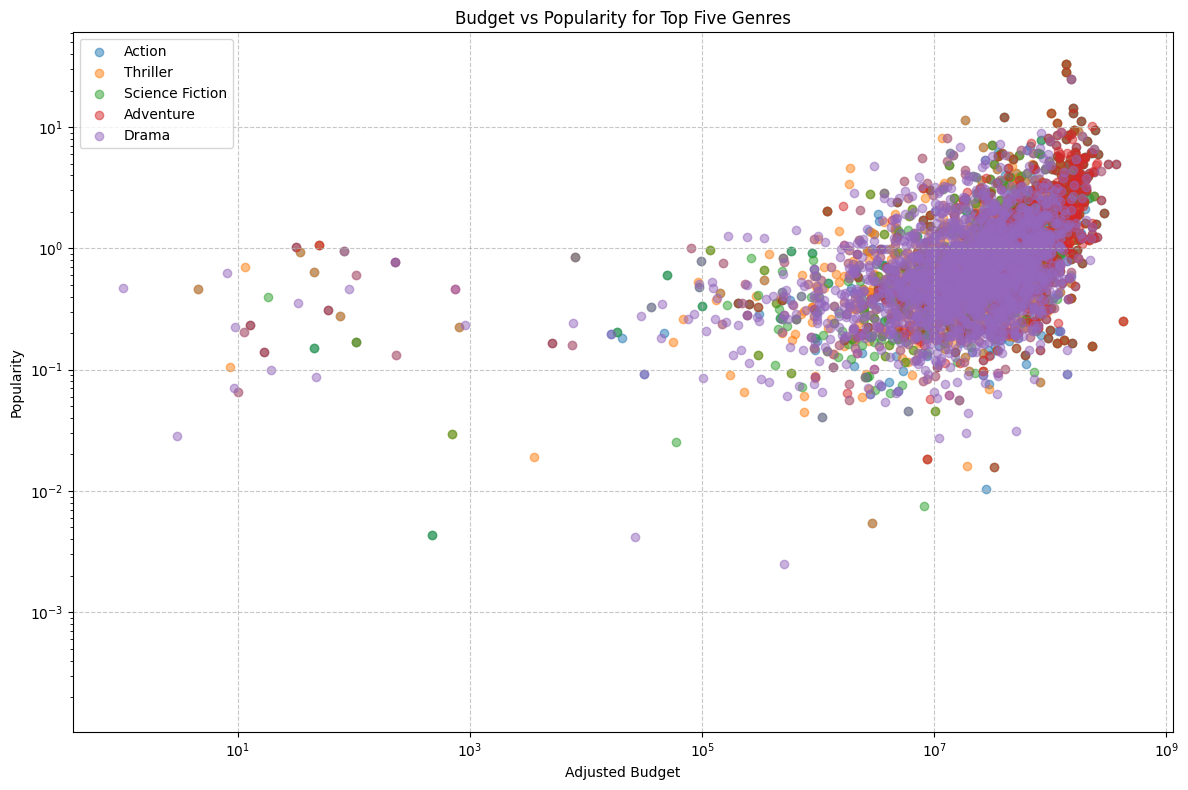

In [45]:
#Creating a scatter plot
plt.figure(figsize=(12, 8))
for genre in top_five_genres:
    genre_data = top_five_data[top_five_data['genres'] ==genre]
    plt.scatter(genre_data['budget_adj'], genre_data['popularity'], alpha=0.5, label=genre)
    
#Title for scatter plot
plt.title('Budget vs Popularity for Top Five Genres')

#Title for x-axis
plt.xlabel('Adjusted Budget')

#Title for y-axis
plt.ylabel('Popularity')

#Scaling do to possible large ranges
plt.xscale('log')
plt.yscale('log')

#For easier readability
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()

*Most of the dots in the scatter plot are located together in the upper right corner which can imply a potential relationship between the budget and popularity of genres!*

**3.3:** Who are the top actors and directors?

In [46]:
#Seperating the elements in the cast column because it contains multiple values split with '|'
cast_columns = tmdb_data_copy['cast'].str.split('|', expand=True)

#Stacking the columns into a single series
top_cast = cast_columns.stack().value_counts().reset_index()
top_cast.columns = ['Cast Member', 'Count']

#Displaying the top ten
top_cast.head(10)

,Cast Member,Count
0,Robert De Niro,68
1,Samuel L. Jackson,66
2,Bruce Willis,61
3,Nicolas Cage,59
4,Michael Caine,51
5,John Cusack,48
6,Robin Williams,48
7,John Goodman,47
8,Morgan Freeman,47
9,Tom Hanks,46


In [47]:
#Finding the top directors
top_directors = tmdb_data_copy['director'].value_counts().reset_index()
top_directors.columns = ['Director', 'Count']

#Displaying the top ten
top_directors.head(10)

,Director,Count
0,Woody Allen,43
1,Clint Eastwood,33
2,Steven Spielberg,29
3,Martin Scorsese,28
4,Ridley Scott,23
5,Steven Soderbergh,22
6,Ron Howard,22
7,Joel Schumacher,20
8,Barry Levinson,19
9,Brian De Palma,19


*It would be nice to know how many times our top cast member, Robert De Niro and our top director, Woody Allen worked together.*

In [ ]:
#Specifying the cast member and director
actor_name = 'Robert De Niro'
director_name = 'Woody Allen'

#Counting how many times both their names show up together
collaboration_count = tmdb_data_copy[(tmdb_data_copy['cast'].str.contains(actor_name, na=False)) & (tmdb_data_copy['director'] == director_name)].shape[0]

#Displaying the collaboration count
collaboration_count

*It seems our top actor has never worked with our top director.*

<a id='conclusions'></a>
## Conclusions

During the research of the TMDb movie data we asked a few question and we are going to finalize our findings here. 

The first two questions were general questions about the data set. We first asked about the average runtimes and discovered most runtimes are between 90 and 100 minutes. The second question was which movie the highest and lowest revenue. The movie with the highest revenue is Avatar with a profit of 2.5 billion dollars. The movie with the lowest revenue is The Warrior's Way with a loss of 413.9 million dollars.

The next question was what are some features that are associated with top movies and we broke that down into three seperate questions. The first part of question three was which genre makes the most profit. We found the top five genres and their average profit gain. The top five genres that make the most profit are Adventure, Action, Comedy, Drama, and Thriller, and the average profit for each genre falls between 85 million and 20 million dollars. We looked at which genres were the most popular and if budget affected them. The top five most popular genres were Action, Thriller, Science Fiction, Adventure, and Drama and there is a potential relationship between popularity and budget. Finally we asked who are the top actors and directors and found that the top actor has never worked with the top director.

Additional research:
- How do vote averages compare across different genres?
- Which directors have the highest average revenue or popularity for their films?
- Are there any patterns in the keywords associated with popular or profitable movies?

Limitations:
The analysis had to replace over 4000 missing values in the revenue and budget columns with null vlaues.The conclusion is not error proof. 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb